In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
churn=pd.read_csv('Churn_Modelling.csv.xls',index_col=0)
churn

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [3]:
churn.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [4]:
churn.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
(churn['Exited']==0).value_counts()
#2037 peoples exited from bank

True     7963
False    2037
Name: Exited, dtype: int64

In [6]:
(churn['Balance']==0).value_counts()
#3617 peoples bank balance is 0

False    6383
True     3617
Name: Balance, dtype: int64

In [7]:
(churn["HasCrCard"]==0).value_counts()
#2945 people dont have credit card

False    7055
True     2945
Name: HasCrCard, dtype: int64

In [8]:
(churn['Tenure']==10).value_counts()
#490 peoples completed 10 years with the bank

False    9510
True      490
Name: Tenure, dtype: int64

### 1- What is the overall churn rate in the dataset, and how does it compare to industry benchmarks?

In [9]:
churn.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
(churn['Exited']==1).value_counts(normalize=True)
#around 20% of peoples exited from the bank it will bring a loss for the bank

False    0.7963
True     0.2037
Name: Exited, dtype: float64

In [11]:
churn[(churn['Exited']==1)&(churn['Balance']==0)]
#500 people have exited from the bank while withdrawing their balance

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.88,1
23,15699309,Gerasimov,510,Spain,Female,38,4,0.0,1,1,0,118913.53,1
31,15589475,Azikiwe,591,Spain,Female,39,3,0.0,3,1,0,140469.38,1
59,15623944,T'ien,511,Spain,Female,66,4,0.0,1,1,0,1643.11,1
82,15663706,Leonard,777,France,Female,32,2,0.0,1,1,0,136458.19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9785,15687626,Zhirov,527,France,Male,39,4,0.0,2,1,0,167183.07,1
9885,15686974,Sergeyeva,751,France,Female,48,4,0.0,1,0,1,30165.06,1
9899,15746569,Tsui,589,France,Male,38,4,0.0,1,1,0,95483.48,1


In [12]:
churn[(churn['Exited']==0)&(churn['Age']>60)]
#349 peoples have exited from the bank after turning 60

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
43,15687946,Osborne,556,France,Female,61,2,117419.35,1,1,1,94153.83,0
45,15684171,Bianchi,660,Spain,Female,61,5,155931.11,1,1,1,158338.39,0
86,15805254,Ndukaku,652,Spain,Female,75,10,0.00,2,1,1,114675.75,0
159,15589975,Maclean,646,France,Female,73,6,97259.25,1,0,1,104719.66,0
182,15789669,Hsia,510,France,Male,65,2,0.00,2,1,1,48071.61,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9754,15705174,Chiedozie,656,Germany,Male,68,7,153545.11,1,1,1,186574.68,0
9766,15777067,Thomas,445,France,Male,64,2,136770.67,1,0,1,43678.06,0
9895,15704795,Vagin,521,France,Female,77,6,0.00,2,1,1,49054.10,0


C:\Users\sachu\AppData\Local\Temp\ipykernel_8072\1618652937.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn['Exited'])


<Axes: xlabel='Exited', ylabel='Density'>

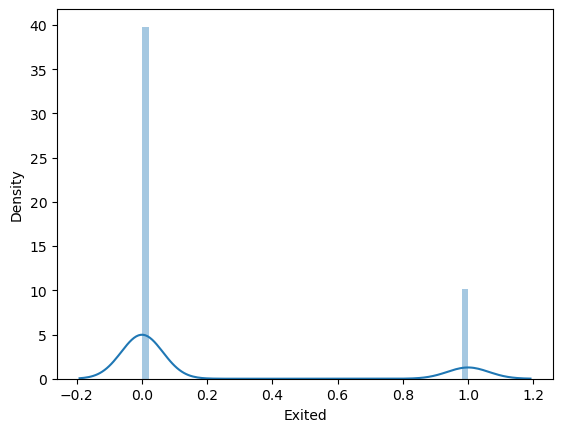

In [13]:
sns.distplot(churn['Exited'])

### 2- Can you identify any significant differences in spending patterns between churned and nonchurned customers using measures of central tendency?

In [14]:
expense=pd.DataFrame(churn['EstimatedSalary']-churn['Balance'])
expense
#Its a new data frame showing the expense of the people in the bank

,0
RowNumber,
1,101348.88
2,28734.72
3,-45729.23
4,93826.63
5,-46426.72
...,...
9996,96270.64
9997,44330.16
9998,42085.58


In [15]:
expense.mean()

0    23604.350593
dtype: float64

In [16]:
expense.median()

0    23511.945
dtype: float64

In [17]:
#both mean and median coming nearly 23k means almost the average spending pattern comes in 23k

### 3- What is the dispersion in customer tenure for both churned and non-churned customers, and how does this affect the predictive modeling process?

In [18]:
exited=churn[(churn['Exited']==1)]
exited

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,15672754,Burbidge,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9983,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1


In [19]:
exit_tenure=exited.loc[:,['Tenure']]
exit_tenure

,Tenure
RowNumber,
1,2
3,8
6,8
8,4
17,1
...,...
9982,3
9983,7
9992,4


###### Exited From The Bank

In [20]:
exit_tenure.mean()

Tenure    4.932744
dtype: float64

In [21]:
np.var(exit_tenure)

Tenure    8.616488
dtype: float64

In [22]:
np.std(exit_tenure)

Tenure    2.935385
dtype: float64

###### Not Exited From The Bank

In [23]:
not_exited=churn[churn['Exited']==0]

In [24]:
not_exited_tenure=not_exited.loc[:,['Tenure']]

In [25]:
not_exited_tenure.mean()

Tenure    5.033279
dtype: float64

In [26]:
np.var(not_exited_tenure)

Tenure    8.297147
dtype: float64

In [27]:
np.std(not_exited_tenure)

Tenure    2.880477
dtype: float64

In [28]:
#There For Both Exited and Not Exited Peoples The Values Are Not Much Dispersed

### 4- How does feature scaling works on top of different features work with different techniques such as min-max,norm,standardization and interpret how each of them worked?

In [29]:
from sklearn import preprocessing

In [30]:
churn_num=churn.select_dtypes(['float64','int64'])
churn_num

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,
1,15634602,619,42,2,0.00,1,1,1,101348.88,1
2,15647311,608,41,1,83807.86,1,0,1,112542.58,0
3,15619304,502,42,8,159660.80,3,1,0,113931.57,1
4,15701354,699,39,1,0.00,2,0,0,93826.63,0
5,15737888,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9996,15606229,771,39,5,0.00,2,1,0,96270.64,0
9997,15569892,516,35,10,57369.61,1,1,1,101699.77,0
9998,15584532,709,36,7,0.00,1,0,1,42085.58,1


In [31]:
normal_churn=preprocessing.normalize(churn_num)

In [32]:
norm_churn=pd.DataFrame(normal_churn,columns=churn_num.columns)
norm_churn

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.999979,0.000040,0.000003,1.279187e-07,0.000000,6.395935e-08,6.395935e-08,6.395935e-08,0.006482,6.395935e-08
1,0.999960,0.000039,0.000003,6.390617e-08,0.005356,6.390617e-08,0.000000e+00,6.390617e-08,0.007192,0.000000e+00
2,0.999921,0.000032,0.000003,5.121463e-07,0.010221,1.920549e-07,6.401829e-08,0.000000e+00,0.007294,6.401829e-08
3,0.999982,0.000045,0.000002,6.368764e-08,0.000000,1.273753e-07,0.000000e+00,0.000000e+00,0.005976,0.000000e+00
4,0.999956,0.000054,0.000003,1.270762e-07,0.007975,6.353810e-08,6.353810e-08,6.353810e-08,0.005025,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...
9995,0.999981,0.000049,0.000002,3.203788e-07,0.000000,1.281515e-07,6.407576e-08,0.000000e+00,0.006169,0.000000e+00
9996,0.999972,0.000033,0.000002,6.422472e-07,0.003685,6.422472e-08,6.422472e-08,6.422472e-08,0.006532,0.000000e+00
9997,0.999996,0.000045,0.000002,4.491617e-07,0.000000,6.416595e-08,0.000000e+00,6.416595e-08,0.002700,6.416595e-08
9998,0.999971,0.000049,0.000003,1.912923e-07,0.004787,1.275282e-07,6.376408e-08,0.000000e+00,0.005923,6.376408e-08


In [33]:
norm_churn.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,0.999953,0.000041,2.480434e-06,3.194753e-07,0.004875,9.751600e-08,4.496297e-08,3.282679e-08,6.378347e-03,1.298236e-08
std,0.000031,0.000006,6.683334e-07,1.843337e-07,0.003977,3.706523e-08,2.905269e-08,3.185224e-08,3.664677e-03,2.566989e-08
min,0.999832,0.000022,1.138200e-06,0.000000e+00,0.000000,6.322177e-08,0.000000e+00,0.000000e+00,7.333044e-07,0.000000e+00
25%,0.999932,0.000037,2.032420e-06,1.896940e-07,0.000000,6.372675e-08,0.000000e+00,0.000000e+00,3.254867e-03,0.000000e+00
50%,0.999956,0.000042,2.369160e-06,3.188621e-07,0.006198,6.422267e-08,6.351803e-08,6.325330e-08,6.383062e-03,0.000000e+00
75%,0.999977,0.000046,2.799654e-06,4.496442e-07,0.008136,1.275023e-07,6.387661e-08,6.374345e-08,9.511575e-03,0.000000e+00
max,1.000000,0.000055,5.874306e-06,6.424146e-07,0.015920,2.569318e-07,6.424287e-08,6.424287e-08,1.280429e-02,6.424287e-08


In [34]:
scaler=preprocessing.StandardScaler()

In [35]:
churn_num1=churn_num.loc[:,["Balance","EstimatedSalary","Tenure"]]

In [36]:
scaled_data=scaler.fit_transform(churn_num1)

In [37]:
churn_scale=pd.DataFrame(scaled_data,columns=churn_num1.columns)
churn_scale

,Balance,EstimatedSalary,Tenure
0,-1.225848,0.021886,-1.041760
1,0.117350,0.216534,-1.387538
2,1.333053,0.240687,1.032908
3,-1.225848,-0.108918,-1.387538
4,0.785728,-0.365276,-1.041760
...,...,...,...
9995,-1.225848,-0.066419,-0.004426
9996,-0.306379,0.027988,1.724464
9997,-1.225848,-1.008643,0.687130
9998,-0.022608,-0.125231,-0.695982


In [38]:
churn_scale.describe()

,Balance,EstimatedSalary,Tenure
count,1.000000e+04,1.000000e+04,1.000000e+04
mean,-6.252776e-17,-2.877698e-17,-1.078249e-16
std,1.000050e+00,1.000050e+00,1.000050e+00
min,-1.225848e+00,-1.740268e+00,-1.733315e+00
25%,-1.225848e+00,-8.535935e-01,-6.959818e-01
50%,3.319639e-01,1.802807e-03,-4.425957e-03
75%,8.199205e-01,8.572431e-01,6.871299e-01
max,2.795323e+00,1.737200e+00,1.724464e+00


### 5- Can you visualize the distribution of customer demographics such as age, income, and location for churned and non-churned customers using histograms or density plots?

{'whiskers': [<matplotlib.lines.Line2D at 0x29447621540>,
 'caps': [<matplotlib.lines.Line2D at 0x29447621a80>,
 'boxes': [<matplotlib.lines.Line2D at 0x294476212a0>],
 'medians': [<matplotlib.lines.Line2D at 0x29447621fc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x29447622260>],
 'means': []}

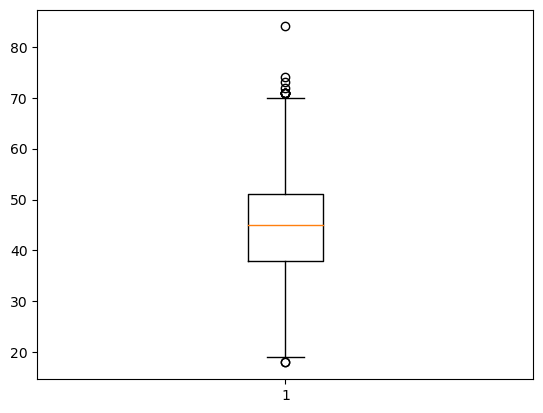

In [39]:
plt.boxplot(exited['Age'])
#max age of exited customers is 70 there are outliers also min age is 20 outliers to down also

C:\Users\sachu\AppData\Local\Temp\ipykernel_8072\2434406122.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn['Age'])


<Axes: xlabel='Age', ylabel='Density'>

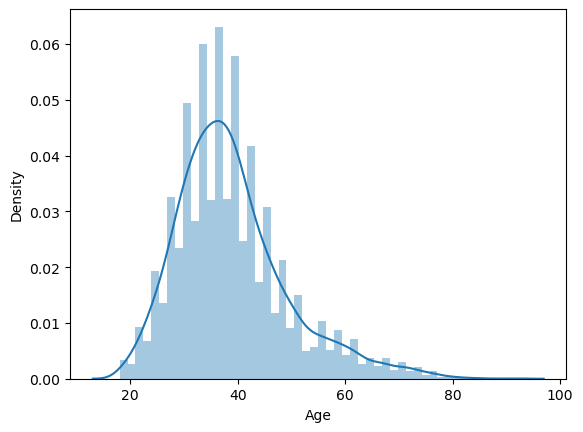

In [40]:
sns.distplot(churn['Age'])
# more frequency is seen in between 40-50

{'whiskers': [<matplotlib.lines.Line2D at 0x29448777ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x2944879c460>,
 'boxes': [<matplotlib.lines.Line2D at 0x29448777c40>],
 'medians': [<matplotlib.lines.Line2D at 0x2944879c9a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2944879cc40>],
 'means': []}

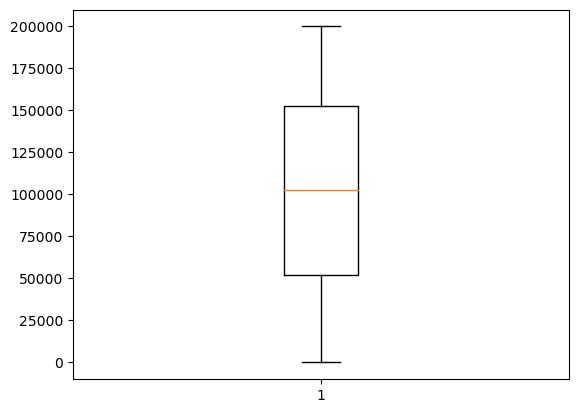

In [41]:
plt.boxplot(exited["EstimatedSalary"])
#average salary of people who churned is 1 lakh

C:\Users\sachu\AppData\Local\Temp\ipykernel_8072\2871959693.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(not_exited["Age"])


<Axes: xlabel='Age', ylabel='Density'>

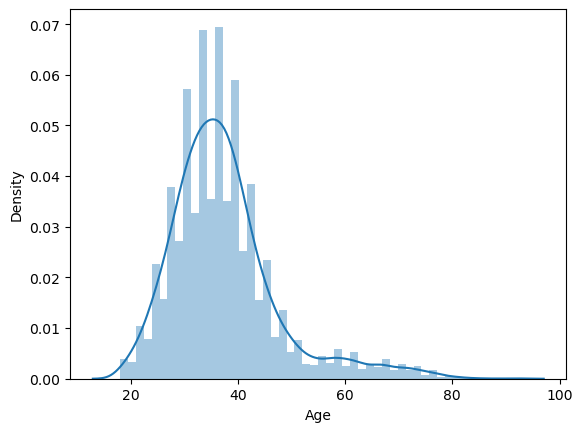

In [42]:
sns.distplot(not_exited["Age"])
#high density can be seen between 25-40 years , they didnt churn

{'whiskers': [<matplotlib.lines.Line2D at 0x294488f4430>,
 'caps': [<matplotlib.lines.Line2D at 0x294488f4970>,
 'boxes': [<matplotlib.lines.Line2D at 0x294488f4190>],
 'medians': [<matplotlib.lines.Line2D at 0x294488f4eb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x294488f5150>],
 'means': []}

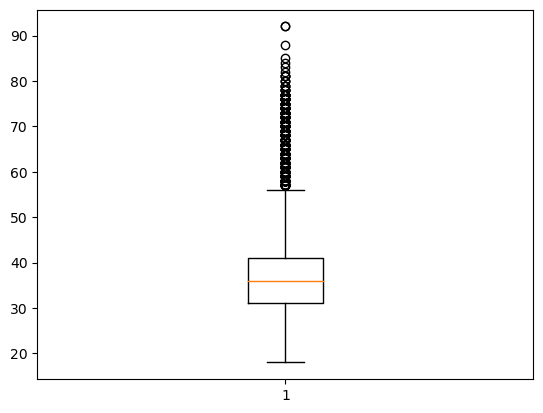

In [43]:
plt.boxplot(not_exited["Age"])

C:\Users\sachu\AppData\Local\Temp\ipykernel_8072\782681435.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(not_exited["EstimatedSalary"])


<Axes: xlabel='EstimatedSalary', ylabel='Density'>

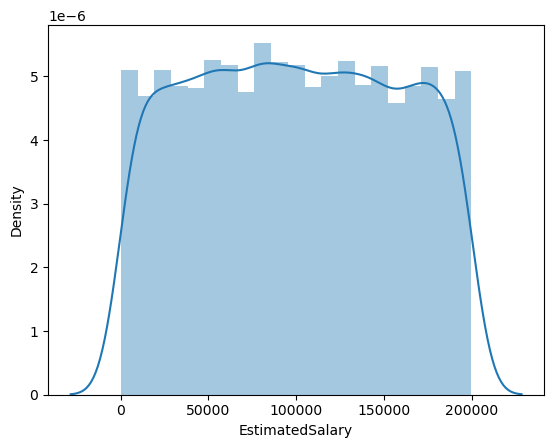

In [44]:
sns.distplot(not_exited["EstimatedSalary"])

{'whiskers': [<matplotlib.lines.Line2D at 0x294489e7730>,
 'caps': [<matplotlib.lines.Line2D at 0x294489e7c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x294489e7490>],
 'medians': [<matplotlib.lines.Line2D at 0x29448a1c1f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x29448a1c490>],
 'means': []}

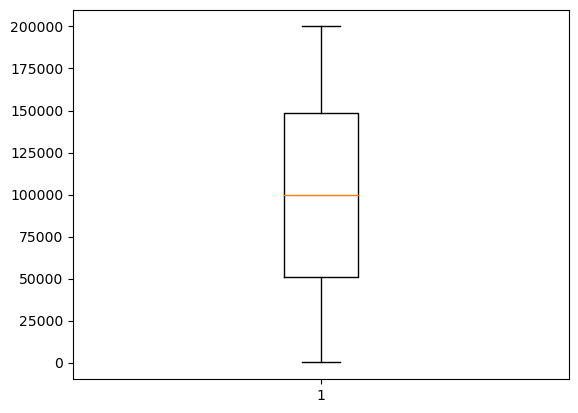

In [45]:
plt.boxplot(not_exited["EstimatedSalary"])

<Axes: title={'center': 'EstimatedSalary'}, xlabel='Geography'>

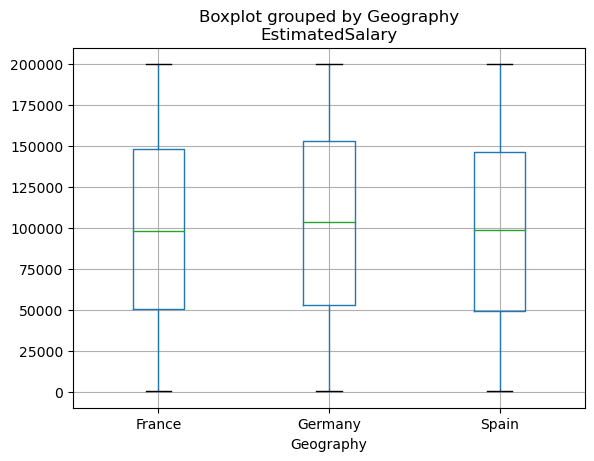

In [46]:
not_exited.boxplot(by="Geography",column="EstimatedSalary")

In [47]:
exited['Geography'].value_counts()

Germany    814
France     810
Spain      413
Name: Geography, dtype: int64

<Axes: title={'center': 'Age'}, xlabel='Geography'>

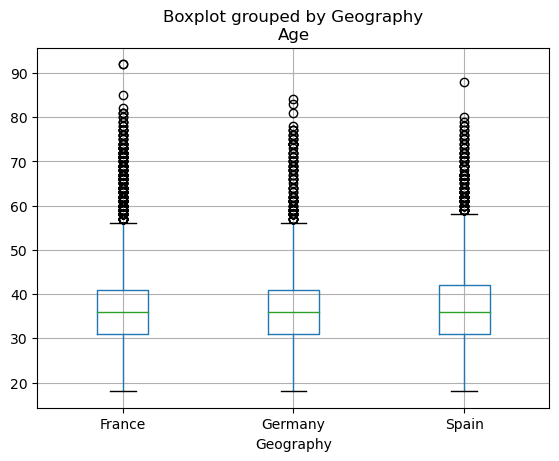

In [48]:
not_exited.boxplot(by='Geography',column='Age')

<Axes: title={'center': 'Age'}, xlabel='Geography'>

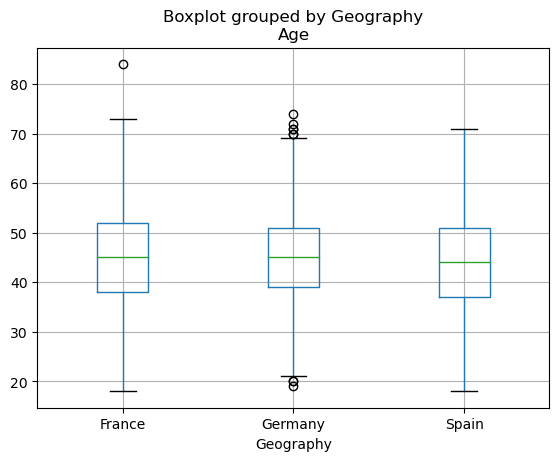

In [49]:
exited.boxplot(by="Geography",column="Age")
#in churned data with comparison of age and place spain is the more without much measure of spread
#non churned data is having a great spread in all three countries

### 6- Is there a significant correlation between customer satisfaction scores and the likelihood of churn, and how does this influence the development of churn prediction models?

In [50]:
corr_exited=exited.corr()

C:\Users\sachu\AppData\Local\Temp\ipykernel_8072\2496950372.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_exited=exited.corr()


In [51]:
corr_exited["CreditScore"].sort_values(ascending=False)
#no correlation for churned customers credit score

CreditScore        1.000000
Tenure             0.027727
Balance            0.017386
NumOfProducts      0.000432
IsActiveMember    -0.000778
CustomerId        -0.001731
Age               -0.011033
HasCrCard         -0.012321
EstimatedSalary   -0.055129
Exited                  NaN
Name: CreditScore, dtype: float64

### 7- What are the key features that exhibit the highest variability between churned and non-churned customers, and how can you leverage this information for feature selection?

In [52]:
exited

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,15672754,Burbidge,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9983,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1


In [53]:
churn_age_std=exited["Age"].std()
churn_age_mean=exited["Age"].mean()
nonchurn_age_std=not_exited["Age"].std()
nonchurn_age_mean=not_exited["Age"].mean()

In [54]:
churn_age_cv=churn_age_std/churn_age_mean
non_churn_age_cv=nonchurn_age_std/nonchurn_age_mean

In [55]:
print(f'The coefficient of variation of churn age: {churn_age_cv}')
print(f'The coefficient of variation of non churned age: {non_churn_age_cv}')
#non churned customers have more coefficient of variation than churned customers
#it defines that non churned customers are orderless and deviated from the average

The coefficient of variation of churn age: 0.2177073508355836
The coefficient of variation of non churned age: 0.2706709173087161


In [56]:
# Now With Estimated Salary

In [57]:
churn_salary_std=exited["EstimatedSalary"].std()
churn_salary_mean=exited["EstimatedSalary"].mean()
nonchurn_salary_std=not_exited["EstimatedSalary"].std()
nonchurn_salary_mean=not_exited["EstimatedSalary"].mean()

In [58]:
churn_salary_cv=churn_salary_std/churn_salary_mean
nonchurn_salary_cv=nonchurn_salary_std/nonchurn_salary_mean

In [59]:
print(f'The coefficient of variation of churn salary: {churn_salary_cv}')
print(f'The coefficient of variation of non churned salary: {nonchurn_salary_cv}')
#so the non churned and churn customers has the same range of cv which implies they both having an ordered data with least number of outliers

The coefficient of variation of churn salary: 0.5707586987066327
The coefficient of variation of non churned salary: 0.5755615861274767


### 8- Are there any outliers in the dataset that could potentially skew the results of the churn prediction model, and how should you handle these outliers?

In [60]:
from sklearn import preprocessing

In [61]:
salary_norm=preprocessing.normalize([exited['EstimatedSalary']])

C:\Users\sachu\AppData\Local\Temp\ipykernel_8072\2992960913.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salary_norm)


<Axes: ylabel='Density'>

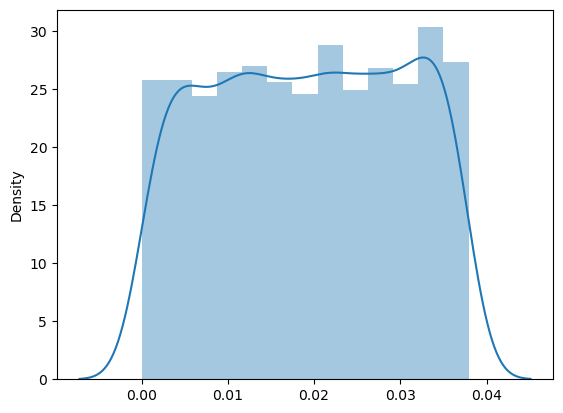

In [62]:
sns.distplot(salary_norm)

C:\Users\sachu\AppData\Local\Temp\ipykernel_8072\1310798190.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(exited['CreditScore'])


<Axes: xlabel='CreditScore', ylabel='Density'>

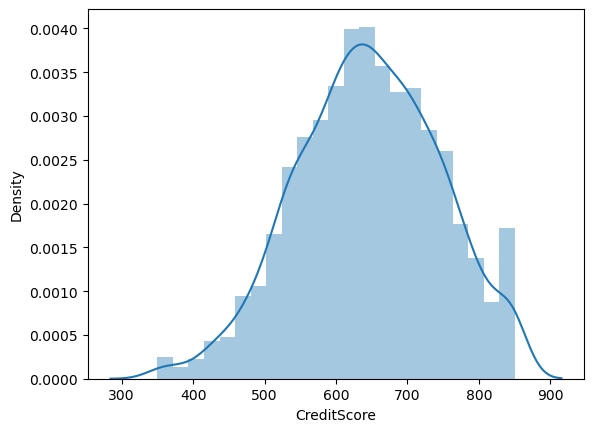

In [63]:
sns.distplot(exited['CreditScore'])

C:\Users\sachu\AppData\Local\Temp\ipykernel_8072\1246016722.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(exited['Age'])


<Axes: xlabel='Age', ylabel='Density'>

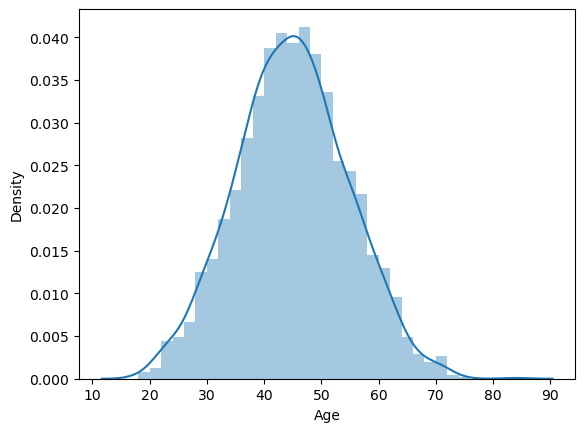

In [64]:
sns.distplot(exited['Age'])

### 9- What is the distribution of customer churn across different demographic segments such as age groups, income levels, and geographical locations, and how does this influence the development of targeted retention strategies?

In [65]:
exited

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,15672754,Burbidge,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9983,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1


In [66]:
exited['NumOfProducts'].value_counts()

1    1409
2     348
3     220
4      60
Name: NumOfProducts, dtype: int64

In [68]:
new_age=not_exited[(not_exited['Age']>=20)&(not_exited['Age']<=30)]
new_age

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0
12,15737173,Andrews,497,Spain,Male,24,3,0.00,2,1,0,76390.01,0
14,15691483,Chin,549,France,Female,25,5,0.00,2,0,0,190857.79,0
18,15788218,Henderson,549,Spain,Female,24,9,0.00,2,1,1,14406.41,0
20,15568982,Hao,726,France,Female,24,6,0.00,2,1,1,54724.03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,15589329,Pirozzi,775,France,Male,30,4,0.00,2,1,0,49337.84,0
9990,15605622,McMillan,841,Spain,Male,28,4,0.00,2,1,1,179436.60,0
9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0


In [69]:
new_age['Geography'].value_counts()

France     966
Spain      424
Germany    384
Name: Geography, dtype: int64

In [70]:
new_age['Tenure'].value_counts()

8     208
4     204
7     201
3     180
2     177
1     175
6     163
5     162
9     155
10     88
0      61
Name: Tenure, dtype: int64

In [71]:
#by finding the age between 20 to 30 is that the most people are started account in this ages and so they cannot be churned suddenly

### 10- What is the range of customer satisfaction scores among churned customers, and how does this range compare to that of retained customers, indicating potential areas for improvement in service quality and customer experience

In [72]:
exited

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,15672754,Burbidge,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9983,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1


In [74]:
exited['IsActiveMember'].value_counts()
#1302 customers are not active members , this can be taken as the reason for churning

0    1302
1     735
Name: IsActiveMember, dtype: int64

In [75]:
exited['NumOfProducts'].value_counts()

1    1409
2     348
3     220
4      60
Name: NumOfProducts, dtype: int64

In [77]:
348+220+60
#Around 628 persons are engaged in banks services like bank loans,credit card services,loans ,investment accounts etc
#The number of products column refers to that type of analysing

628

In [78]:
not_exited["IsActiveMember"].value_counts()

1    4416
0    3547
Name: IsActiveMember, dtype: int64

In [80]:
not_exited["NumOfProducts"].value_counts()
#People who are not churned is widely better than comparing them with churned cutomers

2    4242
1    3675
3      46
Name: NumOfProducts, dtype: int64

### 11- What is the correlation between the timing of customer interactions, such as the frequency of product usage or customer service contacts, and the likelihood of churn, and how can this information be leveraged to develop proactive customer retention interventions?